In [18]:
# Install torch dan torchvision jika belum terinstall
# !pip install torch torchvision


In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import matplotlib.pyplot as plt

In [20]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#MNIST

In [21]:
# Transformasi data MNIST
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Dataset MNIST
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)


In [22]:
# Definisi Simple CNN untuk MNIST
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [25]:
# Initialize model, loss, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [26]:
# Training function
def train_model(model, trainloader, criterion, optimizer, epochs=5):
    model.train()
    train_loss = []
    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        epoch_loss = running_loss / len(trainloader)
        train_loss.append(epoch_loss)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}")
    return train_loss

In [27]:
# Training the model
train_loss_mnist = train_model(model, trainloader, criterion, optimizer)

Epoch 1/5, Loss: 0.1644
Epoch 2/5, Loss: 0.0475
Epoch 3/5, Loss: 0.0332
Epoch 4/5, Loss: 0.0246
Epoch 5/5, Loss: 0.0195


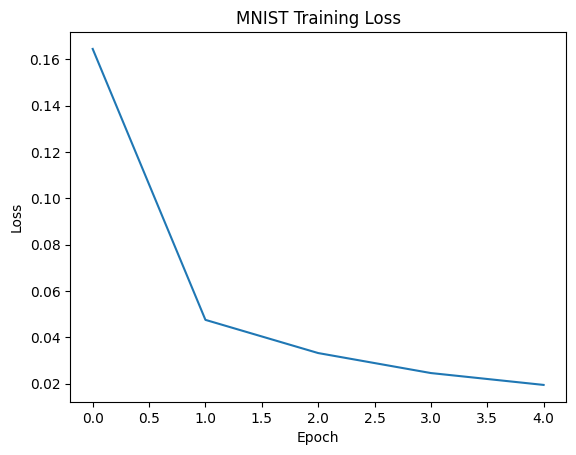

In [28]:
# Plot training loss
plt.plot(train_loss_mnist)
plt.title('MNIST Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

#CIFAR

In [35]:
# Transformasi data CIFAR-10 (resize gambar menjadi 224x224)
transform_cifar = transforms.Compose([
    transforms.Resize(224),  # Resize gambar ke ukuran 224x224
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(224, padding=4),  # Random crop ukuran sesuai 224x224
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


In [36]:
# Dataset CIFAR-10
trainset_cifar = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_cifar)
trainloader_cifar = torch.utils.data.DataLoader(trainset_cifar, batch_size=64, shuffle=True)

testset_cifar = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_cifar)
testloader_cifar = torch.utils.data.DataLoader(testset_cifar, batch_size=64, shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


In [37]:
# Model ResNet
model_cifar = models.alexnet(pretrained=False, num_classes=10)
model_cifar = model_cifar.to(device)

In [38]:
# Loss and optimizer
criterion_cifar = nn.CrossEntropyLoss()
optimizer_cifar = optim.Adam(model_cifar.parameters(), lr=0.001)

In [39]:
# Training function CIFAR
def train_model_cifar(model, trainloader, criterion, optimizer, epochs=5):
    model.train()
    train_loss = []
    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        epoch_loss = running_loss / len(trainloader)
        train_loss.append(epoch_loss)
        print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}")
    return train_loss

In [ ]:
# Training the model on CIFAR-10
train_loss_cifar = train_model_cifar(model_cifar, trainloader_cifar, criterion_cifar, optimizer_cifar)

Epoch 1/5, Loss: 1.7560


In [ ]:
# Plotting CIFAR-10 Training Loss
plt.plot(train_loss_cifar)
plt.title('CIFAR-10 Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()